#### PAIR PROGRAMMING - REGRESIÓN LINEAL 4 - ASUNCIONES: NORMALIDAD, INDEPENDENCIA Y HOMOCEDASTICIDAD

In [1]:
import pandas as pd
import numpy as np

# librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer tamaño fijo de gráficas
# ==================================
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
# ======================
import warnings
warnings.filterwarnings('ignore')

# libreria para cambio de tipo de dato de string a lista
import ast

#importamos la librería statsmodels para hacer el gráfico de cuantiles teóricos (Q-Q plot)
import statsmodels.api as sm

#importamos esta librería para calcular el sesgo (Skew)
from scipy.stats import skew

#importamos esta libreria para calcular la curtosis
from scipy.stats import kurtosistest

#importamos stats para test de shapiro
from scipy import stats

import researchpy as rp

from scipy.stats import levene

In [2]:
df = pd.read_csv("../datos/pokePd1.csv", index_col = 0)
df.head()

,Type,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed
0,Grass,318,45,49,49,65,65,45
1,Poison,318,45,49,49,65,65,45
2,Grass,405,60,62,63,80,80,60
3,Poison,405,60,62,63,80,80,60
4,Grass,525,80,82,83,100,100,80


- En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.
- El objetivo de este pairprogramming es que evaluéis si vuestro set de datos cumple todas las asunciones que se deben cumplir para hacer una regresión lineal. Recordamos que estas asunciones son:

1. Normalidad (ya la deberíais haber evaluado)
2. Homogeneidad de varianzas
3. Independencia de las variables
   
*** Cada asunción la deberéis testar de forma visual y analítica.

- A continuación vemos la distribución de nuestras variables predictoras, así como la línea de regresión que nos muestra la dirección y la desviación típica (si la hay)

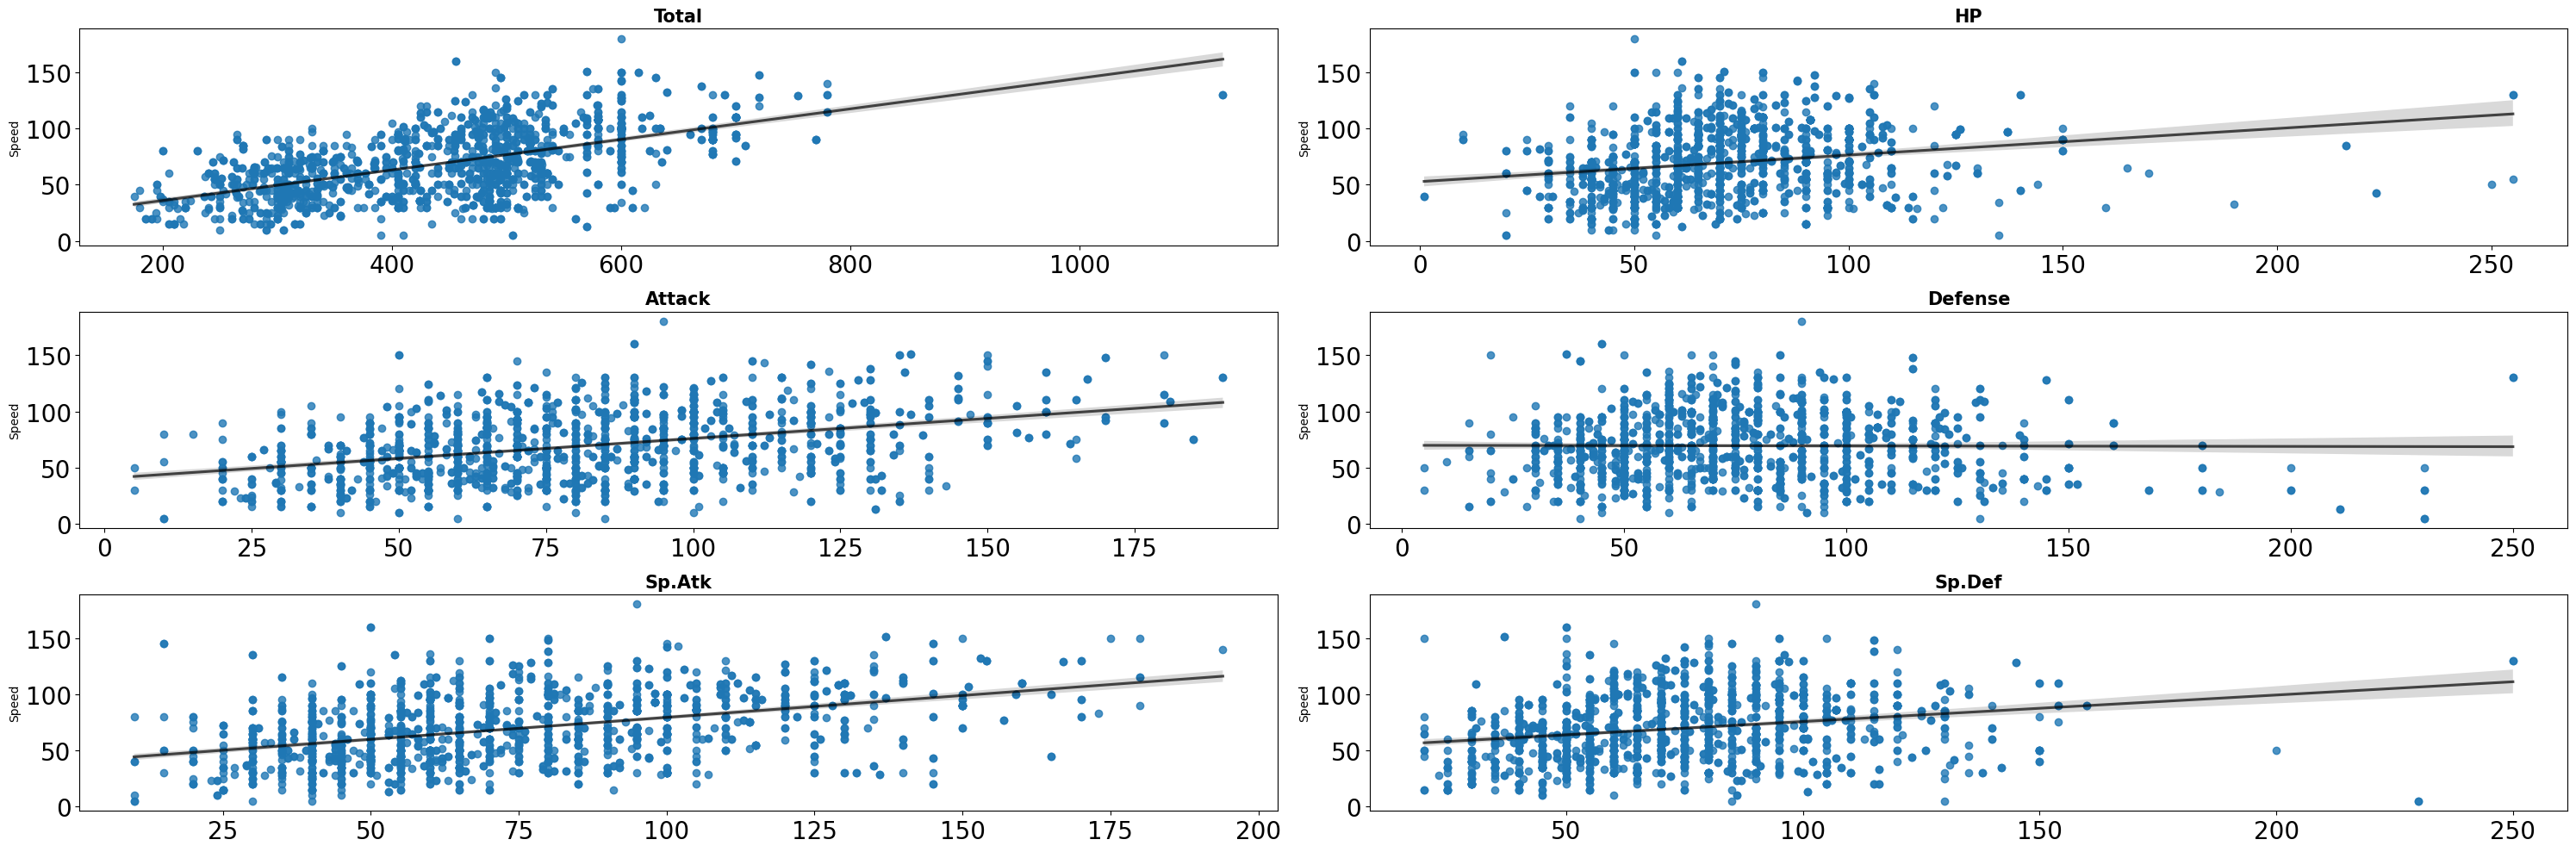

In [4]:
# iniciamos los subplots
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (30, 10))


axes = axes.flat

# seleccionamos las columnas que queremos graficar
columnas_numeric = df.select_dtypes(include = np.number).drop('Speed', axis=1)
columnas_numeric = columnas_numeric.columns

# iniciamos un for loop para no tener que escribir la misma línea de código muchas veces
for i, colum in enumerate(columnas_numeric): 
    sns.regplot(
        data = df,
        x = colum,
        y = 'Speed',
        #color = lista_colores[i],
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    
    # establecemos el título de cada gráfica
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")

    # establacemos el tamaño de la letras de los ejes
    axes[i].tick_params(labelsize = 20)

    # establecemos que no queremos que aparezca nada en el eje x
    axes[i].set_xlabel("")
    
# ajustamos el tamaño de cada subplot para que no se vean superpuestos. 
fig.tight_layout();

- Asunción de Homogeneidad/Homocedasticidad

In [5]:
numericas = df.select_dtypes(include= np.number)
numericas.head()

,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed
0,318,45,49,49,65,65,45
1,318,45,49,49,65,65,45
2,405,60,62,63,80,80,60
3,405,60,62,63,80,80,60
4,525,80,82,83,100,100,80


In [6]:
resultados = {}

In [7]:
columnas_numeric

Index(['Total', 'HP', 'Attack', 'Defense', 'Sp.Atk', 'Sp.Def'], dtype='object')

In [8]:
columnas_numeric = df.select_dtypes(include= np.number).drop('Speed', axis = 1)

#iteremos por la lista de las columnas numéricas
for col in columnas_numeric.columns:
    # calculamos el p-valor de test
    statistic, p_val = levene(df[col], df.Speed, center='median')
    # lo almacenamos en el diccionario
    resultados[col] = p_val

In [9]:
# Obtenemos el diccionario de resultados, donde aparecen recogidos los datos de las homogeneidades de las variables predictoras
# Todos los valores son menores que 0.05, lo que quiere decir que son homogéneas entre sí, menos la variable Defensa, cuyo valor es mayor a 0. 05, y por tanto, no cumple la asunción de homogeneidad.
# ¿Qué hariamos en este caso? Según teoría transformación de la variable o usar otro algoritmo: RANDOM FOREST O DECISSION TREE

resultados

{'Total': 2.5056212394617558e-260,
 'HP': 2.3194521152727345e-18,
 'Attack': 0.011062792407408295,
 'Defense': 0.6830744431813129,
 'Sp.Atk': 0.0032231436152696698,
 'Sp.Def': 4.206180099266433e-05}

Asunción de Independencia

- Variables numéricas:

In [32]:
numericas.corr()

,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed
Total,1.000000,0.663814,0.737112,0.626921,0.730966,0.715885,0.558698
HP,0.663814,1.000000,0.459535,0.308664,0.390891,0.393641,0.207963
Attack,0.737112,0.459535,1.000000,0.441377,0.376919,0.260485,0.390982
Defense,0.626921,0.308664,0.441377,1.000000,0.215696,0.545703,-0.005181
Sp.Atk,0.730966,0.390891,0.376919,0.215696,1.000000,0.502462,0.432276
Sp.Def,0.715885,0.393641,0.260485,0.545703,0.502462,1.000000,0.223320
Speed,0.558698,0.207963,0.390982,-0.005181,0.432276,0.223320,1.000000


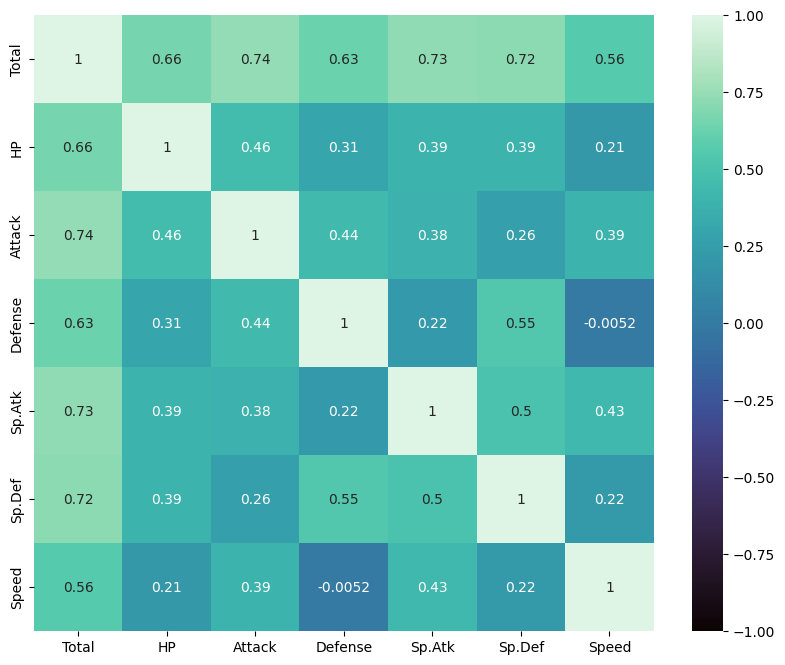

In [33]:
sns.heatmap(numericas.corr(), annot = True, vmin = -1, vmax = 1, cmap ='mako');

COMENTARIO:
- Al revisar el heatmap respecto a las variables numéricas, podemos ver que tenemos correlaciones bastante altas (> 0.7) en Special Defense, Special Attack, Attack con respecto al Total. 
- Percibimos correlaciones altas en Defense, HP con respecto al Total.
- De Special Defense y Defense (0.55) y SP.DEfense y Sp.Attack (0.5).
- Vemos que apenas hay correlaciones negativas; solo hay una, pero es tan pequeña y tan cercana al 0, lo que indica que no existe correlación entre Speed y Defense.

- Variables categóricas

In [43]:
df_normal = pd.read_csv('../datos/poke_copia.csv', index_col = 0)

In [44]:
df_normal.head()

,Name,Type,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed
0,Bulbasaur,Grass,318,45,49,49,65,65,45
1,Bulbasaur,Poison,318,45,49,49,65,65,45
2,Ivysaur,Grass,405,60,62,63,80,80,60
3,Ivysaur,Poison,405,60,62,63,80,80,60
4,Venusaur,Grass,525,80,82,83,100,100,80


In [46]:
crosstab1, test_results1, expected1 = rp.crosstab(df_normal["Type"], df_normal["Name"], #¿Tenemos que mirarlo así, intuyo pero con cuál la comparamos? 
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

In [47]:
test_results1

,Chi-square test,results
0,Pearson Chi-square ( 17561.0) =,16830.9931
1,p-value =,1.0000
2,Cramer's V =,0.7916


In [ ]:
crosstab1, test_results1, expected1 = rp.crosstab(df["Type"], df["Attack"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

In [ ]:
#sacar el número total de columnas numéricas

In [ ]:
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (30, 10))

# definimos una lista de colores. Cada color corresponderá a una gráfica
lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

# hemos creado una gráfica con varios subplots. Si queremos automatizar el proceso de relleno de cada uno de los plots
## podemos usar el método .flat. Lo que hace es aplanar los ejes para que queden en una única dimensión
## y luego los vamos rellenando. 
axes = axes.flat

# seleccionamos las columnas que queremos graficar
columnas_numeric = df.select_dtypes(include = np.number).drop('Speed', axis=1)
columnas_numeric = columnas_numeric.columns

# iniciamos un for loop para no tener que escribir la misma línea de código muchas veces
for i, colum in enumerate(columnas_numeric): 
    sns.regplot(
        data = df,
        x = colum,
        y = 'Type',
        #color = lista_colores[i],
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    
    # establecemos el título de cada gráfica
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")

    # establacemos el tamaño de la letras de los ejes
    axes[i].tick_params(labelsize = 20)

    # establecemos que no queremos que aparezca nada en el eje x
    axes[i].set_xlabel("")
    
# ajustamos el tamaño de cada subplot para que no se vean superpuestos. 
fig.tight_layout();

In [ ]:
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (30, 10))

# definimos una lista de colores. Cada color corresponderá a una gráfica
lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

# hemos creado una gráfica con varios subplots. Si queremos automatizar el proceso de relleno de cada uno de los plots
## podemos usar el método .flat. Lo que hace es aplanar los ejes para que queden en una única dimensión
## y luego los vamos rellenando. 
axes = axes.flat

# seleccionamos las columnas que queremos graficar
columnas_numeric = df.select_dtypes(include = np.number).drop('Speed', axis=1)
columnas_numeric = columnas_numeric.columns

# iniciamos un for loop para no tener que escribir la misma línea de código muchas veces
for i, colum in enumerate(columnas_numeric): 
    sns.scatterplot(
        data = df,
        x = colum,
        y = 'Type',
        #color = lista_colores[i],
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    
    # establecemos el título de cada gráfica
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")

    # establacemos el tamaño de la letras de los ejes
    axes[i].tick_params(labelsize = 20)

    # establecemos que no queremos que aparezca nada en el eje x
    axes[i].set_xlabel("")
    
# ajustamos el tamaño de cada subplot para que no se vean superpuestos. 
fig.tight_layout();